# Results of Global search 
## Synthetic 3 Layer case

In [1]:
%matplotlib widget

In [2]:
# Import libraries
#import empymod
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import mu_0
import pandas as pd
import pygimli as pg

import sys
sys.path.insert(1, '../../src')

from PlotModel import PlotModelCond_3lay, PlotErrorSpace, PlotData, rmse_a
from EM1D import EMforward3lay

### Show Model

In [3]:
# Import the conductivities and thicknesses used to create the LU table

conds = np.load('../data/conds.npy')
thick = np.load('../data/thicks.npy')

model_true = np.load('../data/model_synth.npy')
#model_est = np.load('../data/model_est.npy')
data_true =  np.load('../data/data_synth.npy')

npos = len(model_true)
nlayer = 3

depths_true = np.zeros((npos, nlayer))
sigmas_true = np.zeros((npos, nlayer))

depths_true[:,1] = model_true[:,3]
depths_true[:,2] = model_true[:,3] + model_true[:,4]
sigmas_true[:,:] = model_true[:,:3]

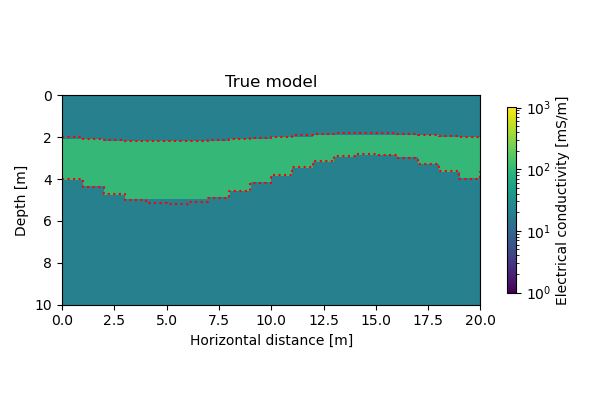

In [4]:
PlotModelCond_3lay(sigmas_true, depths_true[:,1:])
xx = np.linspace(0,npos+1,npos+1, endpoint=False)
plt.step(np.hstack((xx, xx[-1])), np.hstack((depths_true[0,1],depths_true[:,1], depths_true[-2,1])), ':r')
plt.step(np.hstack((xx, xx[-1])), np.hstack((depths_true[0,2],depths_true[:,2], depths_true[-2,2])), ':r')
plt.title('True model')
plt.tight_layout()

### Test minimization scheme

In [38]:
# Create forward modeller class

class EMforward_3lay(pg.Modelling):
    def __init__(self):
        """Initialize the model."""
        super().__init__()        
    def response(self, x):
        sig1 = x[0]
        sig2 = x[1]
        sig3 = x[2]
        thk1 = x[3]
        thk2 = x[4]
        Z = EMforward3lay(sig1, sig2, sig3, thk1, thk2, height=0.47)                           
        return Z               
    def createStartModel(self, dataVals):
        thk_ini = [2,3]
        sig_ini = [1/20,1/20, 1/20]
        x0 = sig_ini + thk_ini
        return np.array(x0)

In [39]:
# Initialize the forward modelling class
EMf_3lay = EMforward_3lay()

In [40]:
# Relative error array
error = 1e-3 # introduce here the error you want to test
relativeError = np.ones_like(data_true[0]) * error

In [41]:
# Define inversion transformations

transData = pg.trans.TransLog() # log transformation for data
transModel = pg.trans.TransLog()  # log-transform ensures thk and res >0

# Create inversion
invEM = pg.Inversion()
invEM.setForwardOperator(EMf_3lay)

invEM.transModel = transModel
invEM.transData = transData

In [42]:
# Start inversion

model_est = np.zeros_like(model_true)
#chi2hist = [] # empty array to store the chi2 history
#modelhist = [] # empty array to store the model history

# Perform inversion for each 1D model per position in stitched section
for pos in range(npos):
    dataE = data_true[pos].copy()
    dataE *= np.random.randn(len(dataE)) * relativeError + 1.0
    model_est_pos = invEM.run(dataE, relativeError, verbose=False, lam=10, maxIter=40)
    #chi2hist.append(invEM.chi2History)
    #modelhist.append(invEM.modelHistory)
    model_est[pos] = model_est_pos

18/07/23 - 17:03:01 - pyGIMLi - INFO - Created startmodel from forward operator: [0.05 0.05 0.05 2.   3.  ]
18/07/23 - 17:03:03 - pyGIMLi - INFO - Created startmodel from forward operator: [0.05 0.05 0.05 2.   3.  ]


18/07/23 - 17:03:04 - pyGIMLi - INFO - Created startmodel from forward operator: [0.05 0.05 0.05 2.   3.  ]


18/07/23 - 17:03:05 - pyGIMLi - INFO - Created startmodel from forward operator: [0.05 0.05 0.05 2.   3.  ]


18/07/23 - 17:03:05 - pyGIMLi - INFO - Created startmodel from forward operator: [0.05 0.05 0.05 2.   3.  ]


18/07/23 - 17:03:06 - pyGIMLi - INFO - Created startmodel from forward operator: [0.05 0.05 0.05 2.   3.  ]


18/07/23 - 17:03:07 - pyGIMLi - INFO - Created startmodel from forward operator: [0.05 0.05 0.05 2.   3.  ]


18/07/23 - 17:03:07 - pyGIMLi - INFO - Created startmodel from forward operator: [0.05 0.05 0.05 2.   3.  ]
18/07/23 - 17:03:08 - pyGIMLi - INFO - Created startmodel from forward operator: [0.05 0.05 0.05 2.   3.  ]
18/07/23 - 17:03:10 - pyGIMLi - INFO - Created startmodel from forward operator: [0.05 0.05 0.05 2.   3.  ]


18/07/23 - 17:03:11 - pyGIMLi - INFO - Created startmodel from forward operator: [0.05 0.05 0.05 2.   3.  ]


18/07/23 - 17:03:14 - pyGIMLi - INFO - Created startmodel from forward operator: [0.05 0.05 0.05 2.   3.  ]


18/07/23 - 17:03:16 - pyGIMLi - INFO - Created startmodel from forward operator: [0.05 0.05 0.05 2.   3.  ]


18/07/23 - 17:03:17 - pyGIMLi - INFO - Created startmodel from forward operator: [0.05 0.05 0.05 2.   3.  ]


18/07/23 - 17:03:18 - pyGIMLi - INFO - Created startmodel from forward operator: [0.05 0.05 0.05 2.   3.  ]


18/07/23 - 17:03:20 - pyGIMLi - INFO - Created startmodel from forward operator: [0.05 0.05 0.05 2.   3.  ]
18/07/23 - 17:03:21 - pyGIMLi - INFO - Created startmodel from forward operator: [0.05 0.05 0.05 2.   3.  ]


18/07/23 - 17:03:22 - pyGIMLi - INFO - Created startmodel from forward operator: [0.05 0.05 0.05 2.   3.  ]


18/07/23 - 17:03:23 - pyGIMLi - INFO - Created startmodel from forward operator: [0.05 0.05 0.05 2.   3.  ]
18/07/23 - 17:03:24 - pyGIMLi - INFO - Created startmodel from forward operator: [0.05 0.05 0.05 2.   3.  ]


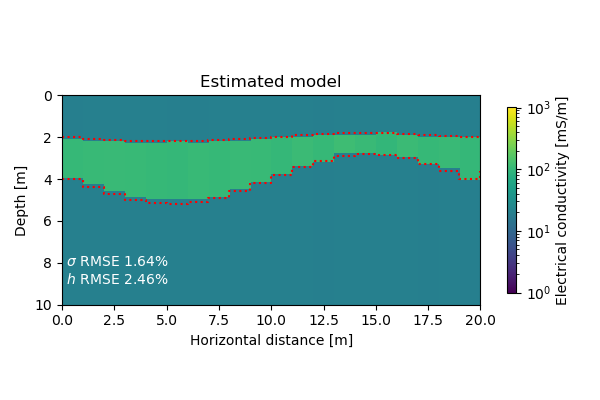

In [43]:
depths_est = np.zeros_like(depths_true)
sigmas_est = np.zeros_like(sigmas_true)
depths_est[:,1] = model_est[:,3]
depths_est[:,2] = model_est[:,3] + model_est[:,4]
sigmas_est[:,:] = model_est[:,:3]

RMSE_res = rmse_a(np.log10(np.hstack(sigmas_est)), np.log10(np.hstack(sigmas_true)))
RMSE_thk = rmse_a(np.hstack(depths_est[:,1:]), np.hstack(depths_true[:,1:]))

PlotModelCond_3lay(sigmas_est, depths_est[:,1:])
xx = np.linspace(0,npos+1,npos+1, endpoint=False)
plt.step(np.hstack((xx, xx[-1])), np.hstack((depths_true[0,1],depths_true[:,1], depths_true[-2,1])), ':r')
plt.step(np.hstack((xx, xx[-1])), np.hstack((depths_true[0,2],depths_true[:,2], depths_true[-2,2])), ':r')
plt.text(0,9,' $\sigma$ RMSE %.3g' %(RMSE_res*100) + '%' 
          +' \n $h$ RMSE %.3g' %(RMSE_thk*100) +'%', color='w')

plt.title('Estimated model')
plt.tight_layout()

In [44]:
# Create forward modeller class

class EMforward_3lay_Q(pg.Modelling):
    def __init__(self):
        """Initialize the model."""
        super().__init__()        
    def response(self, x):
        sig1 = x[0]
        sig2 = x[1]
        sig3 = x[2]
        thk1 = x[3]
        thk2 = x[4]
        Z = EMforward3lay(sig1, sig2, sig3, thk1, thk2, height=0.47)                           
        return Z[:9]
    def createStartModel(self, dataVals):
        thk_ini = [2,3]
        sig_ini = [1/20,1/20, 1/20]
        x0 = sig_ini + thk_ini
        return np.array(x0)

In [45]:
# Initialize the forward modelling class
EMf_3lay_Q = EMforward_3lay_Q()

# Relative error array
error = 1e-3 # introduce here the error you want to test
relativeError = np.ones_like(data_true[0,:9]) * error

# Define inversion transformations
transData = pg.trans.TransLog() # log transformation for data
transModel = pg.trans.TransLog()  # log-transform ensures thk and res >0

# Create inversion
invEM = pg.Inversion()
invEM.setForwardOperator(EMf_3lay_Q)

invEM.transModel = transModel
invEM.transData = transData

# Start inversion
model_est_Q = np.zeros_like(model_true)
#chi2hist = [] # empty array to store the chi2 history
#modelhist = [] # empty array to store the model history

# Perform inversion for each 1D model per position in stitched section
for pos in range(npos):
    dataE = data_true[pos,:9].copy()
    dataE *= np.random.randn(len(dataE)) * relativeError + 1.0
    model_est_pos = invEM.run(dataE, relativeError, verbose=False, lam=10, maxIter=40)
    #chi2hist.append(invEM.chi2History)
    #modelhist.append(invEM.modelHistory)
    model_est_Q[pos] = model_est_pos

18/07/23 - 17:08:20 - pyGIMLi - INFO - Created startmodel from forward operator: [0.05 0.05 0.05 2.   3.  ]
18/07/23 - 17:08:23 - pyGIMLi - INFO - Created startmodel from forward operator: [0.05 0.05 0.05 2.   3.  ]
18/07/23 - 17:08:26 - pyGIMLi - INFO - Created startmodel from forward operator: [0.05 0.05 0.05 2.   3.  ]
18/07/23 - 17:08:28 - pyGIMLi - INFO - Created startmodel from forward operator: [0.05 0.05 0.05 2.   3.  ]
18/07/23 - 17:08:30 - pyGIMLi - INFO - Created startmodel from forward operator: [0.05 0.05 0.05 2.   3.  ]
18/07/23 - 17:08:33 - pyGIMLi - INFO - Created startmodel from forward operator: [0.05 0.05 0.05 2.   3.  ]
18/07/23 - 17:08:34 - pyGIMLi - INFO - Created startmodel from forward operator: [0.05 0.05 0.05 2.   3.  ]
18/07/23 - 17:08:36 - pyGIMLi - INFO - Created startmodel from forward operator: [0.05 0.05 0.05 2.   3.  ]
18/07/23 - 17:08:38 - pyGIMLi - INFO - Created startmodel from forward operator: [0.05 0.05 0.05 2.   3.  ]
18/07/23 - 17:08:40 - pyGIML

18/07/23 - 17:08:47 - pyGIMLi - INFO - Created startmodel from forward operator: [0.05 0.05 0.05 2.   3.  ]


18/07/23 - 17:08:49 - pyGIMLi - INFO - Created startmodel from forward operator: [0.05 0.05 0.05 2.   3.  ]


18/07/23 - 17:08:53 - pyGIMLi - INFO - Created startmodel from forward operator: [0.05 0.05 0.05 2.   3.  ]


18/07/23 - 17:08:56 - pyGIMLi - INFO - Created startmodel from forward operator: [0.05 0.05 0.05 2.   3.  ]


18/07/23 - 17:09:00 - pyGIMLi - INFO - Created startmodel from forward operator: [0.05 0.05 0.05 2.   3.  ]


18/07/23 - 17:09:02 - pyGIMLi - INFO - Created startmodel from forward operator: [0.05 0.05 0.05 2.   3.  ]
18/07/23 - 17:09:04 - pyGIMLi - INFO - Created startmodel from forward operator: [0.05 0.05 0.05 2.   3.  ]


18/07/23 - 17:09:06 - pyGIMLi - INFO - Created startmodel from forward operator: [0.05 0.05 0.05 2.   3.  ]


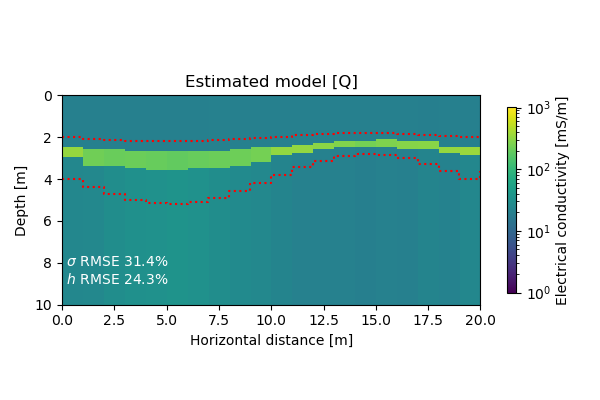

In [46]:
depths_est_Q = np.zeros_like(depths_true)
sigmas_est_Q = np.zeros_like(sigmas_true)
depths_est_Q[:,1] = model_est_Q[:,3]
depths_est_Q[:,2] = model_est_Q[:,3] + model_est_Q[:,4]
sigmas_est_Q[:,:] = model_est_Q[:,:3]

RMSE_res = rmse_a(np.log10(np.hstack(sigmas_est_Q)), np.log10(np.hstack(sigmas_true)))
RMSE_thk = rmse_a(np.hstack(depths_est_Q[:,1:]), np.hstack(depths_true[:,1:]))

PlotModelCond_3lay(sigmas_est_Q, depths_est_Q[:,1:])
xx = np.linspace(0,npos+1,npos+1, endpoint=False)
plt.step(np.hstack((xx, xx[-1])), np.hstack((depths_true[0,1],depths_true[:,1], depths_true[-2,1])), ':r')
plt.step(np.hstack((xx, xx[-1])), np.hstack((depths_true[0,2],depths_true[:,2], depths_true[-2,2])), ':r')
plt.text(0,9,' $\sigma$ RMSE %.3g' %(RMSE_res*100) + '%' 
          +' \n $h$ RMSE %.3g' %(RMSE_thk*100) +'%', color='w')

plt.title('Estimated model [Q]')
plt.tight_layout()

In [47]:
# Create forward modeller class

class EMforward_3lay_IP(pg.Modelling):
    def __init__(self):
        """Initialize the model."""
        super().__init__()        
    def response(self, x):
        sig1 = x[0]
        sig2 = x[1]
        sig3 = x[2]
        thk1 = x[3]
        thk2 = x[4]
        Z = EMforward3lay(sig1, sig2, sig3, thk1, thk2, height=0.47)                           
        return Z[9:]
    def createStartModel(self, dataVals):
        thk_ini = [2,3]
        sig_ini = [1/20,1/20, 1/20]
        x0 = sig_ini + thk_ini
        return np.array(x0)

In [48]:
# Initialize the forward modelling class
EMf_3lay_IP = EMforward_3lay_IP()

# Relative error array
error = 1e-3 # introduce here the error you want to test
relativeError = np.ones_like(data_true[0,9:]) * error

# Define inversion transformations
transData = pg.trans.TransLog() # log transformation for data
transModel = pg.trans.TransLog()  # log-transform ensures thk and res >0

# Create inversion
invEM = pg.Inversion()
invEM.setForwardOperator(EMf_3lay_IP)

invEM.transModel = transModel
invEM.transData = transData

# Start inversion
model_est_IP = np.zeros_like(model_true)
#chi2hist = [] # empty array to store the chi2 history
#modelhist = [] # empty array to store the model history

# Perform inversion for each 1D model per position in stitched section
for pos in range(npos):
    dataE = data_true[pos,9:].copy()
    dataE *= np.random.randn(len(dataE)) * relativeError + 1.0
    model_est_pos = invEM.run(dataE, relativeError, verbose=False, lam=10, maxIter=40)
    #chi2hist.append(invEM.chi2History)
    #modelhist.append(invEM.modelHistory)
    model_est_IP[pos] = model_est_pos

18/07/23 - 17:11:56 - pyGIMLi - INFO - Created startmodel from forward operator: [0.05 0.05 0.05 2.   3.  ]
18/07/23 - 17:11:57 - pyGIMLi - INFO - Created startmodel from forward operator: [0.05 0.05 0.05 2.   3.  ]
18/07/23 - 17:11:58 - pyGIMLi - INFO - Created startmodel from forward operator: [0.05 0.05 0.05 2.   3.  ]
18/07/23 - 17:11:59 - pyGIMLi - INFO - Created startmodel from forward operator: [0.05 0.05 0.05 2.   3.  ]
18/07/23 - 17:12:00 - pyGIMLi - INFO - Created startmodel from forward operator: [0.05 0.05 0.05 2.   3.  ]
18/07/23 - 17:12:01 - pyGIMLi - INFO - Created startmodel from forward operator: [0.05 0.05 0.05 2.   3.  ]
18/07/23 - 17:12:03 - pyGIMLi - INFO - Created startmodel from forward operator: [0.05 0.05 0.05 2.   3.  ]
18/07/23 - 17:12:04 - pyGIMLi - INFO - Created startmodel from forward operator: [0.05 0.05 0.05 2.   3.  ]
18/07/23 - 17:12:05 - pyGIMLi - INFO - Created startmodel from forward operator: [0.05 0.05 0.05 2.   3.  ]
18/07/23 - 17:12:06 - pyGIML

18/07/23 - 17:12:20 - pyGIMLi - INFO - Created startmodel from forward operator: [0.05 0.05 0.05 2.   3.  ]


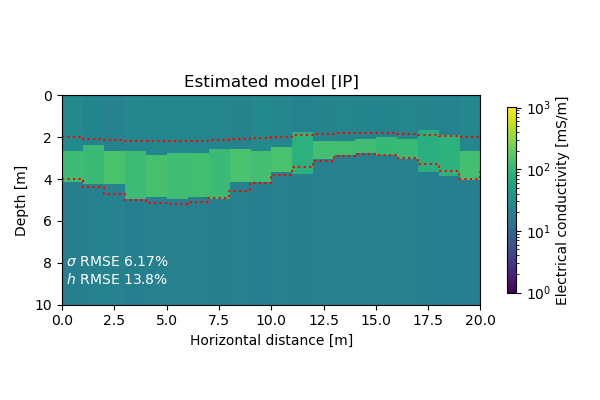

In [49]:
depths_est_IP = np.zeros_like(depths_true)
sigmas_est_IP = np.zeros_like(sigmas_true)
depths_est_IP[:,1] = model_est_IP[:,3]
depths_est_IP[:,2] = model_est_IP[:,3] + model_est_IP[:,4]
sigmas_est_IP[:,:] = model_est_IP[:,:3]

RMSE_res = rmse_a(np.log10(np.hstack(sigmas_est_IP)), np.log10(np.hstack(sigmas_true)))
RMSE_thk = rmse_a(np.hstack(depths_est_IP[:,1:]), np.hstack(depths_true[:,1:]))

PlotModelCond_3lay(sigmas_est_IP, depths_est_IP[:,1:])
xx = np.linspace(0,npos+1,npos+1, endpoint=False)
plt.step(np.hstack((xx, xx[-1])), np.hstack((depths_true[0,1],depths_true[:,1], depths_true[-2,1])), ':r')
plt.step(np.hstack((xx, xx[-1])), np.hstack((depths_true[0,2],depths_true[:,2], depths_true[-2,2])), ':r')
plt.text(0,9,' $\sigma$ RMSE %.3g' %(RMSE_res*100) + '%' 
          +' \n $h$ RMSE %.3g' %(RMSE_thk*100) +'%', color='w')

plt.title('Estimated model [IP]')
plt.tight_layout()